### Author---> Abhishek Kumar
### Project---> Diabetes Patient Prediction Using Machine Learning Project

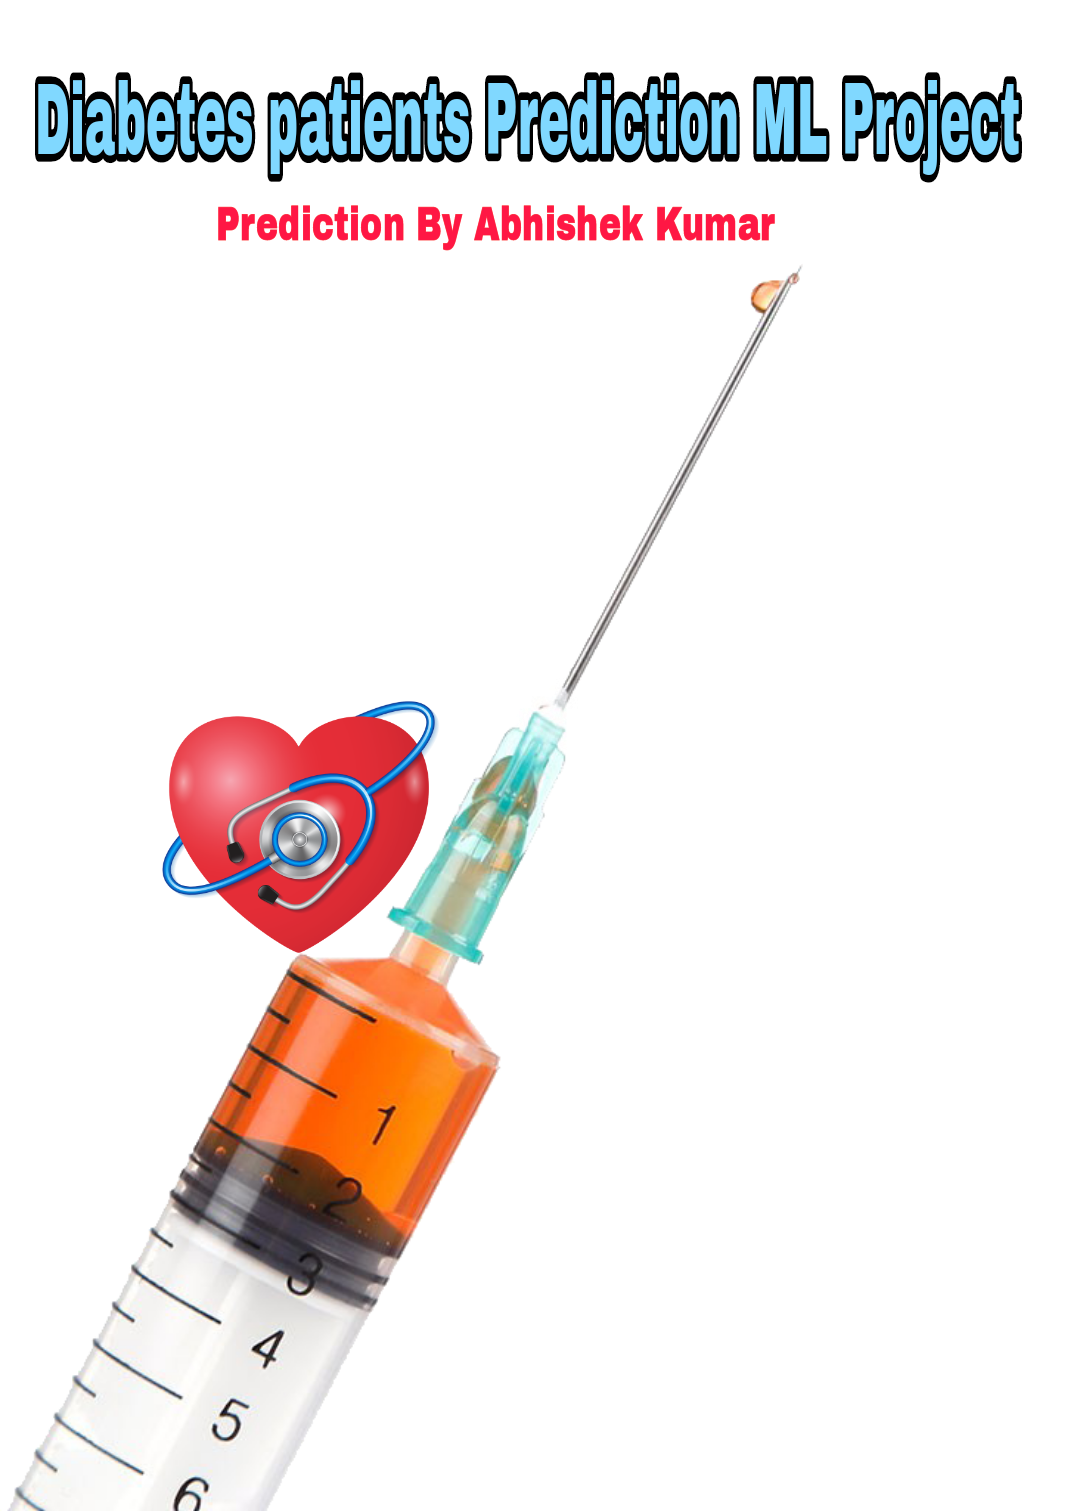

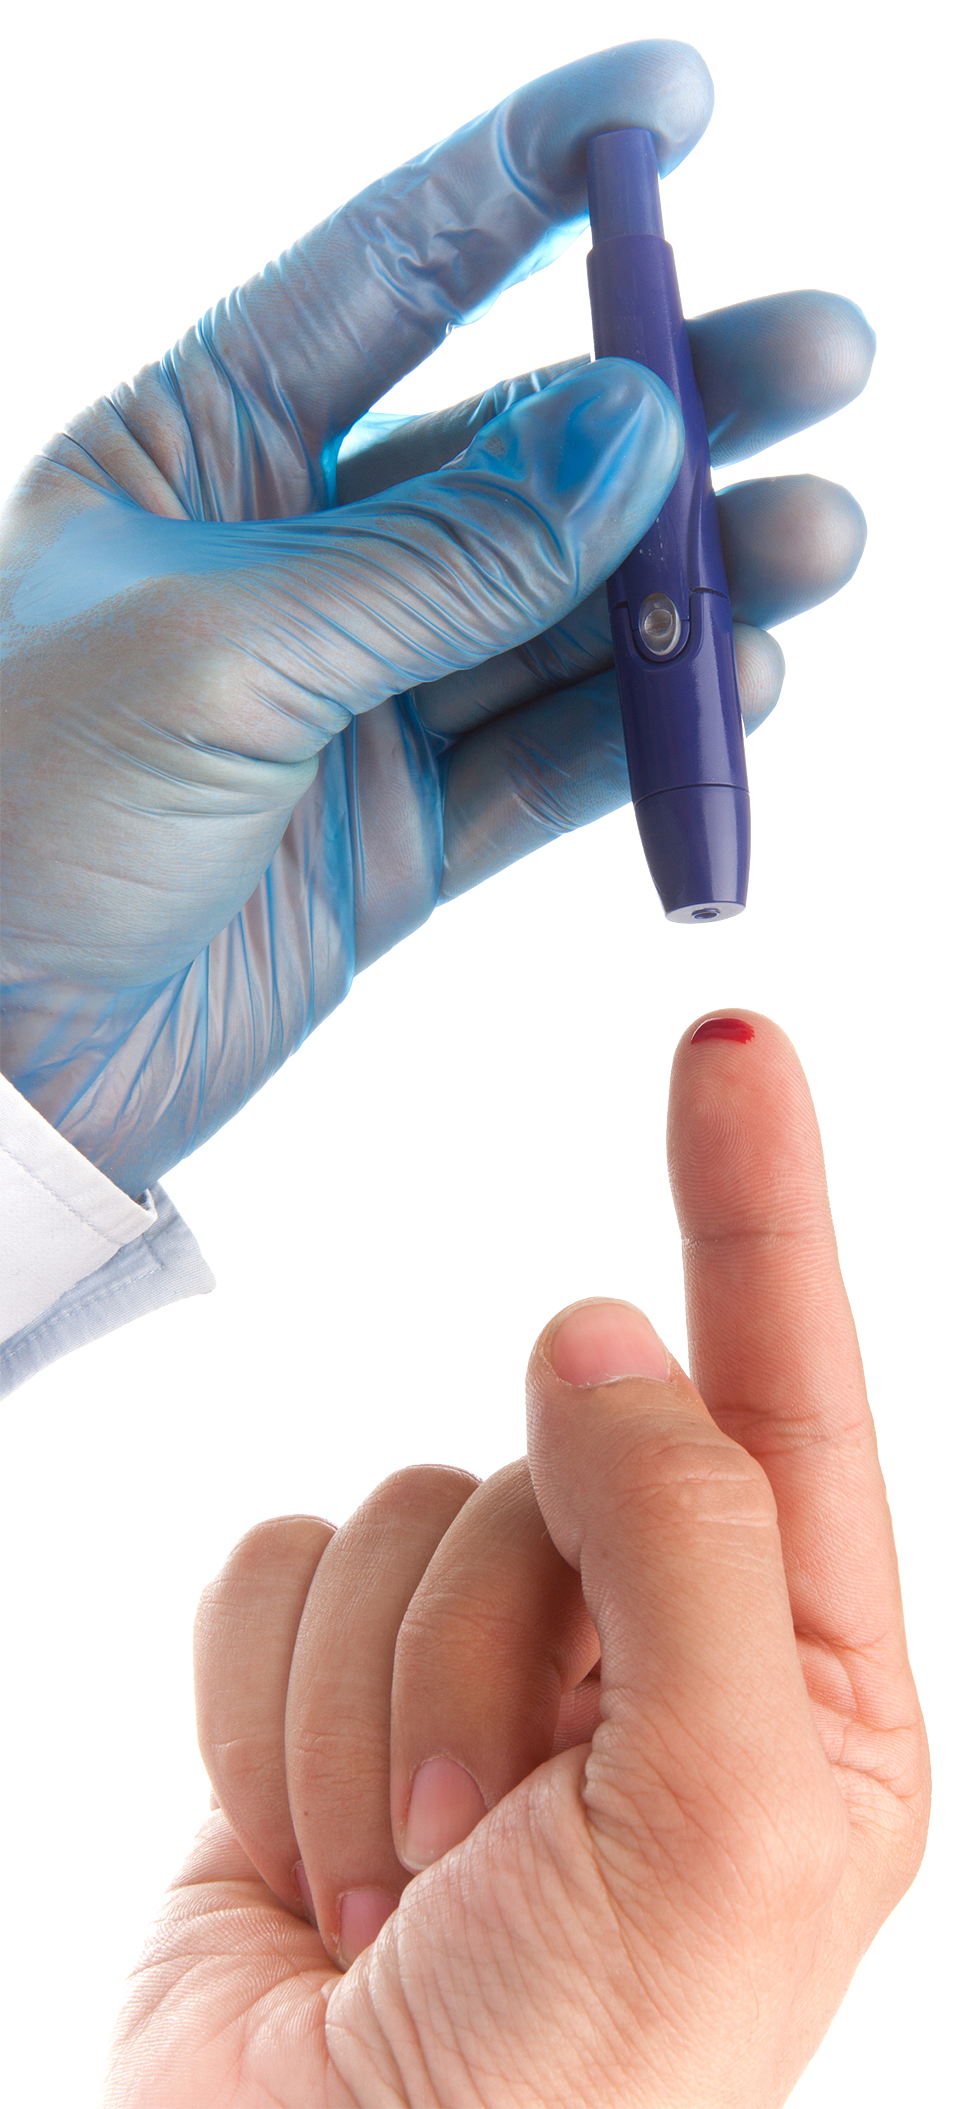

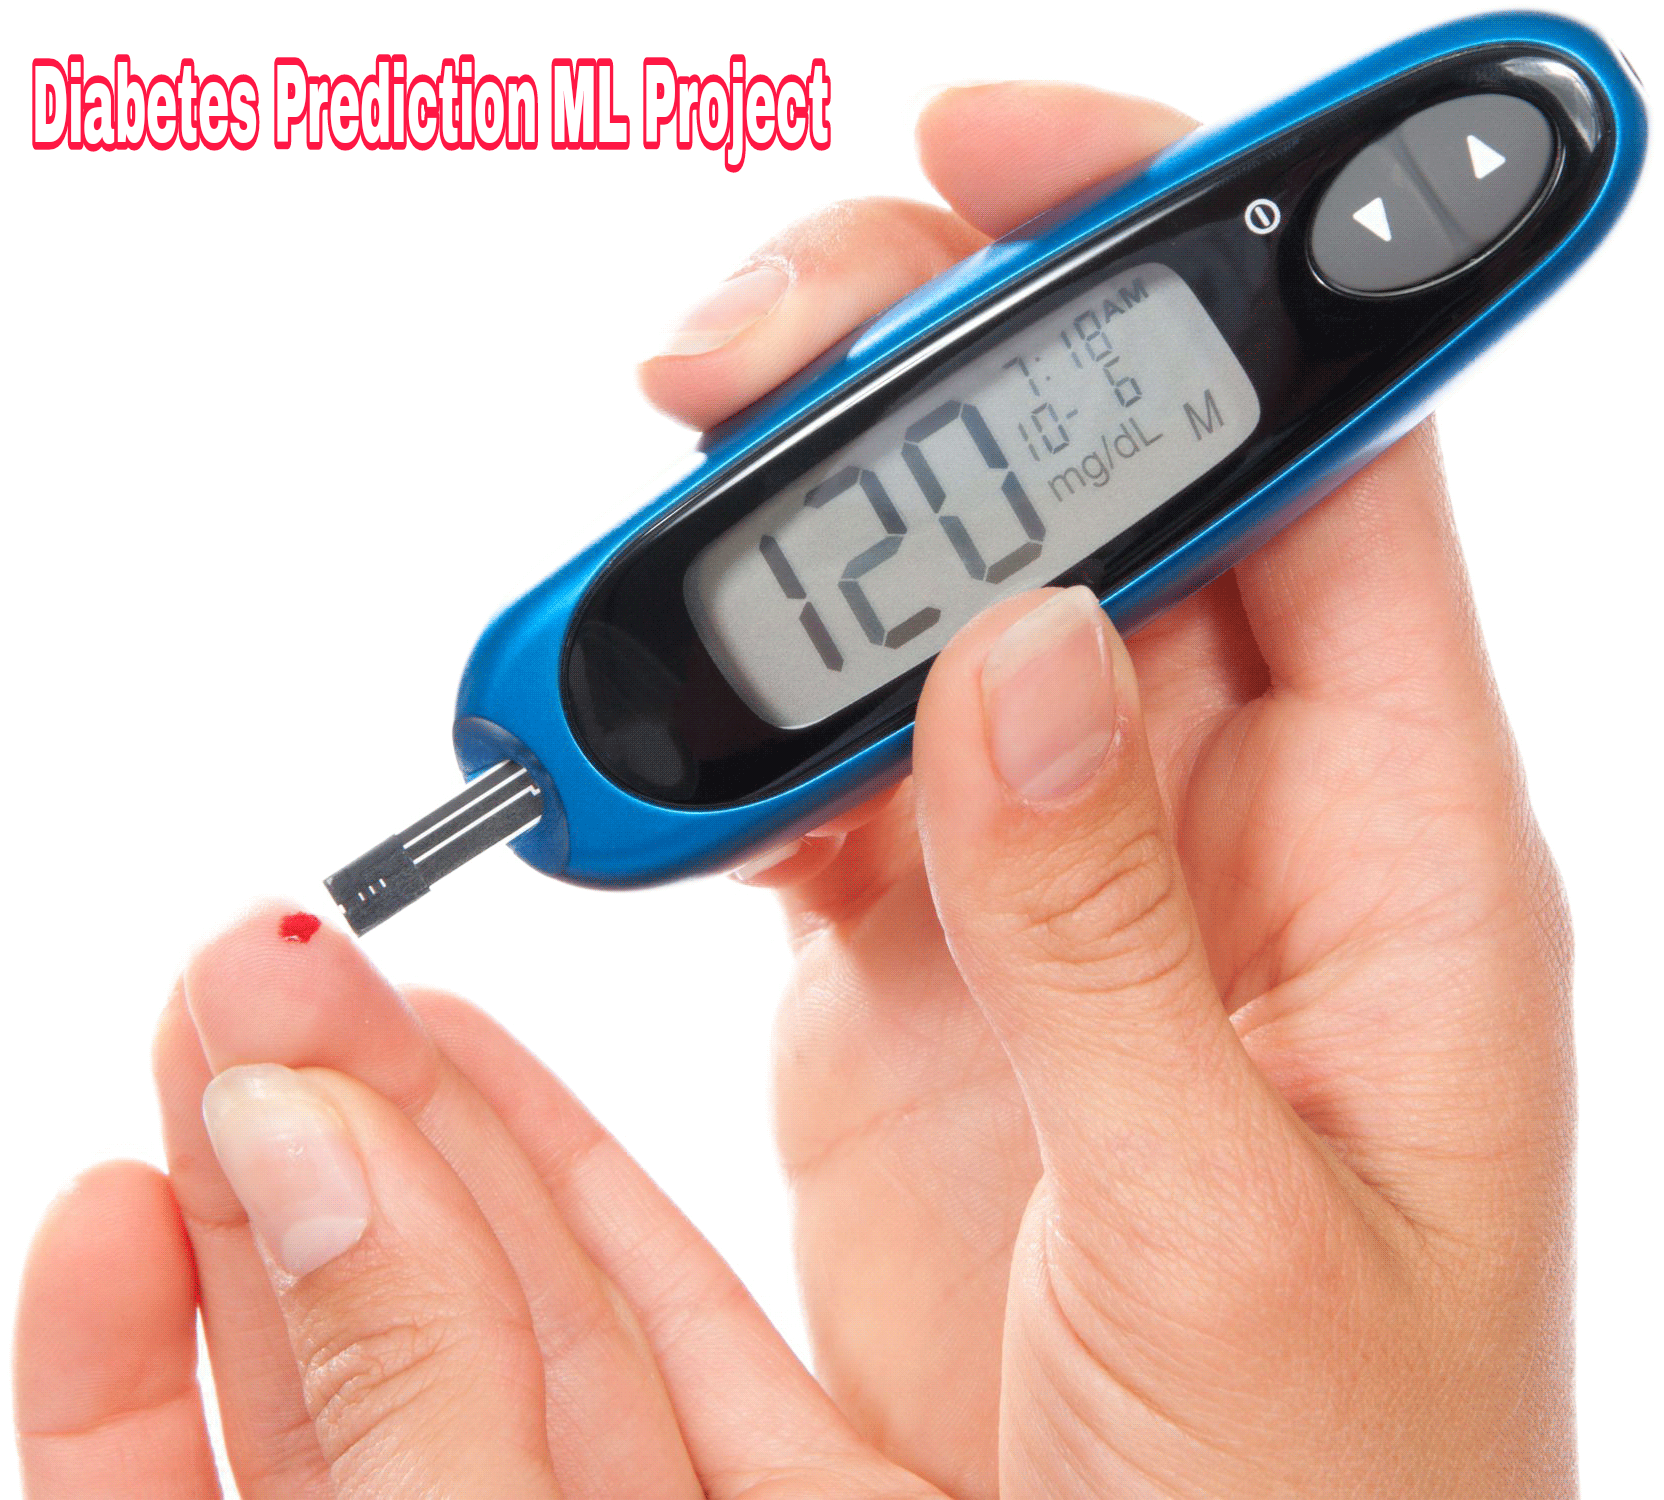

#### Step1--> Import the important Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


#### Step2--> Data Collection and Analysis 
Now loading the csv file from the Diabetes Dataset

In [4]:
daibetes_dataset = pd.read_csv("diabetes.csv")

In [5]:
daibetes_dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [6]:
## Now Printing the First 5 Rows of the dataset
daibetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [15]:
daibetes_dataset.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [10]:
# Number of Row or Columns in this dataset
daibetes_dataset.shape


(768, 9)

In [11]:
daibetes_dataset.size

6912

In [12]:
# Getting the Statistical measure of the data
daibetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
daibetes_dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [14]:
daibetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
daibetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
daibetes_dataset['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [18]:
daibetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### 0---->Non-Diabetes
#### 1---->Diabetes 

In [21]:
daibetes_dataset.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

#### Separating the data and label-->

In [25]:
X = daibetes_dataset.drop(columns ='Outcome', axis=1)
Y = daibetes_dataset['Outcome']

In [26]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [27]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Standazation--->

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X)

StandardScaler()

In [30]:
standardized_data = scaler.transform(X)

In [32]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [33]:
X = standardized_data
Y = daibetes_dataset['Outcome']

In [34]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [37]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### @ Train_Test Split--->

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### @ Now Traning the Model-->

In [44]:
classifier = svm.SVC(kernel='linear')

## Traning the support vector Machine Classifier--->

In [46]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation--->

In [47]:
## Accuracy Score on the Traming data

In [50]:
X_train_prediction = classifier.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [54]:
print('Accuracy score of the traning Data : ', traning_data_accuracy)

Accuracy score of the traning Data :  0.7866449511400652


In [55]:
## Accuracy score on the test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [59]:
print('Accuracy score of the test Data :', test_data_accuracy)

Accuracy score of the test Data : 0.7727272727272727


### Now Making prediction System--->

In [74]:
input_data = [4,110,92,0,0,37.6,0.191,30]

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one Instance-->
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not daibetes")

else:
    print("The Person is daibetes")


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not daibetes


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
input_data = [0,137,40,35,168,43.1,2.288,33]

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one Instance-->
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not daibetes")

else:
    print("The Person is daibetes")


[[-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]
[1]
The Person is daibetes


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
input_data = [1,189,60,23,846,30.1,0.398,59]

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one Instance-->
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not daibetes")

else:
    print("The Person is daibetes")


[[-0.84488505  2.13150675 -0.47073225  0.15453319  6.65283938 -0.24020459
  -0.2231152   2.19178518]]
[1]
The Person is daibetes


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
input_data = [10,139,80,0,0,27.1,1.441,57]

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one Instance-->
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)\

if (prediction[0] == 0):
    print("The person is not daibetes")

else:
    print("The Person is daibetes")


[[ 1.82781311  0.56664949  0.56322275 -1.28821221 -0.69289057 -0.62096232
   2.92686858  2.02160968]]
[1]
The Person is daibetes


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
input_data = [5,116,74,0,0,25.6,0.201,30]

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one Instance-->
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)\

if (prediction[0] == 0):
    print("The person is not daibetes")

else:
    print("The Person is daibetes")


[[ 0.3429808  -0.15318486  0.25303625 -1.28821221 -0.69289057 -0.81134119
  -0.81807858 -0.27575966]]
[0]
The person is not daibetes


C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Thank You